# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Define empty list for holding the latitude and longitude combinations
lat_lngs = []

# Define empty list for holding the city names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data using for and enumerate functions
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Define endpoint URL with each city
    city_url = (f'{url}appid={weather_api_key}&q={city}')
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))    

    # Add 1 to the record count
    record_count += 1 

    # Run an API request for each of the cities using try and except function
    response = requests.get(city_url)
    
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | beloha
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | hurricane
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | price
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | kulhudhuffushi
Processing Record 20 of Set 1 | yantzaza
Processing Record 21 of Set 1 | bluff
Processing Record 22 

Processing Record 35 of Set 4 | chuy
Processing Record 36 of Set 4 | stawell
Processing Record 37 of Set 4 | port blair
Processing Record 38 of Set 4 | xiaolingwei
Processing Record 39 of Set 4 | ponta do sol
Processing Record 40 of Set 4 | komsomolskiy
Processing Record 41 of Set 4 | fortuna
Processing Record 42 of Set 4 | lastoursville
Processing Record 43 of Set 4 | severodvinsk
Processing Record 44 of Set 4 | mardin
Processing Record 45 of Set 4 | constitucion
Processing Record 46 of Set 4 | karaton
Processing Record 47 of Set 4 | adrar
Processing Record 48 of Set 4 | coahuayana
Processing Record 49 of Set 4 | carora
Processing Record 0 of Set 5 | bella vista
Processing Record 1 of Set 5 | talgar
Processing Record 2 of Set 5 | angoram
Processing Record 3 of Set 5 | tessalit
Processing Record 4 of Set 5 | sao felix do xingu
Processing Record 5 of Set 5 | port alfred
Processing Record 6 of Set 5 | marica
Processing Record 7 of Set 5 | grand centre
City not found. Skipping...
Processi

Processing Record 25 of Set 8 | shinyanga
Processing Record 26 of Set 8 | laela
Processing Record 27 of Set 8 | cibitoke
Processing Record 28 of Set 8 | kamenka
Processing Record 29 of Set 8 | eyemouth
Processing Record 30 of Set 8 | vila velha
Processing Record 31 of Set 8 | tarpon springs
Processing Record 32 of Set 8 | wajima
Processing Record 33 of Set 8 | casper
Processing Record 34 of Set 8 | zapolyarnyy
Processing Record 35 of Set 8 | kavaratti
Processing Record 36 of Set 8 | jiwani
Processing Record 37 of Set 8 | ilulissat
Processing Record 38 of Set 8 | gwadar
Processing Record 39 of Set 8 | cumberland
Processing Record 40 of Set 8 | sechura
Processing Record 41 of Set 8 | longlac
City not found. Skipping...
Processing Record 42 of Set 8 | imeni stepana razina
Processing Record 43 of Set 8 | viedma
Processing Record 44 of Set 8 | bargal
City not found. Skipping...
Processing Record 45 of Set 8 | lavrentiya
Processing Record 46 of Set 8 | shetpe
Processing Record 47 of Set 8 | 

Processing Record 7 of Set 12 | semporna
Processing Record 8 of Set 12 | trelaze
Processing Record 9 of Set 12 | snezhnogorsk
Processing Record 10 of Set 12 | nkowakowa
Processing Record 11 of Set 12 | kondopoga
Processing Record 12 of Set 12 | berlevag
Processing Record 13 of Set 12 | kuusamo
Processing Record 14 of Set 12 | hattiesburg
Processing Record 15 of Set 12 | abong mbang
Processing Record 16 of Set 12 | ketchikan
Processing Record 17 of Set 12 | jacksonville
Processing Record 18 of Set 12 | calama
Processing Record 19 of Set 12 | hanstholm
Processing Record 20 of Set 12 | linqing
Processing Record 21 of Set 12 | tasco
Processing Record 22 of Set 12 | kheralu
Processing Record 23 of Set 12 | alice springs
Processing Record 24 of Set 12 | jerico
Processing Record 25 of Set 12 | mrirt
City not found. Skipping...
Processing Record 26 of Set 12 | yellapur
Processing Record 27 of Set 12 | kaitangata
Processing Record 28 of Set 12 | benguela
Processing Record 29 of Set 12 | callawa

In [4]:
# Convert the cities weather data into a Pandas DataFrame and convert temperature from Kelvin to Celsius 
city_data_df = pd.DataFrame(city_data)
city_data_df['Max Temp'] = city_data_df['Max Temp']-273.15

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,esperance,-33.8667,121.9000,25.21,43,100,3.29,AU,1669784245
1,kapaa,22.0752,-159.3190,26.18,84,0,1.54,US,1669783964
2,codrington,-38.2667,141.9667,16.16,64,91,4.73,AU,1669784245
3,albany,42.6001,-73.9662,0.33,83,100,0.45,US,1669783957
4,beloha,-25.1667,45.0500,24.06,71,100,2.94,MG,1669784246


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,esperance,-33.8667,121.9000,25.21,43,100,3.29,AU,1669784245
1,kapaa,22.0752,-159.3190,26.18,84,0,1.54,US,1669783964
2,codrington,-38.2667,141.9667,16.16,64,91,4.73,AU,1669784245
3,albany,42.6001,-73.9662,0.33,83,100,0.45,US,1669783957
4,beloha,-25.1667,45.0500,24.06,71,100,2.94,MG,1669784246


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

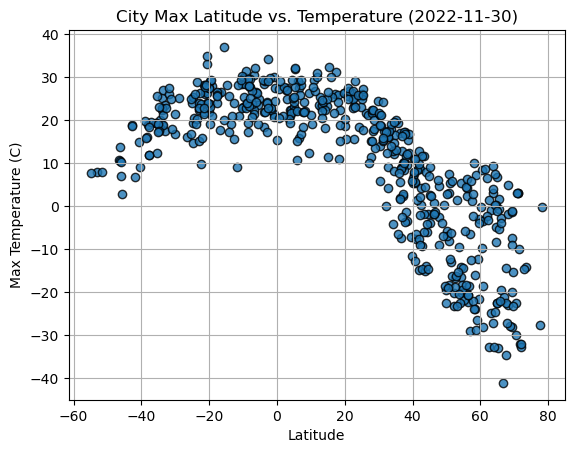

In [3]:
# Build scatter plot for latitude vs. temperature

# Convert date to y/m/d format and define variable
date = pd.to_datetime(city_data_df['Date'], unit='s').apply(lambda t: t.strftime('%Y-%m-%d'))[0]

# Create plot
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],c="tab:blue", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature ({date})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

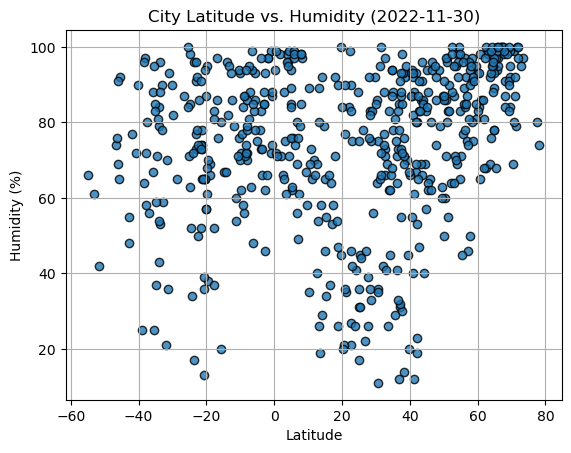

In [4]:
# Build scatter plot for latitude vs. humidity

# Convert date to y/m/d format and define variable
date = pd.to_datetime(city_data_df['Date'], unit='s').apply(lambda t: t.strftime('%Y-%m-%d'))[0]

# Create plot
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],c="tab:blue", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

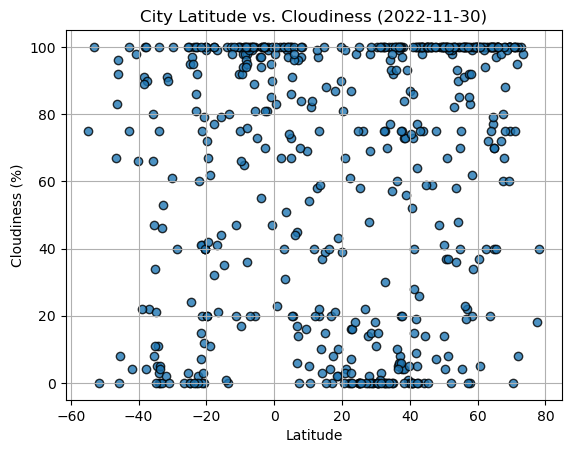

In [5]:
# Build the scatter plots for latitude vs. cloudiness

# Convert date to y/m/d format and define variable
date = pd.to_datetime(city_data_df['Date'], unit='s').apply(lambda t: t.strftime('%Y-%m-%d'))[0]

# Create plot
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],c="tab:blue", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

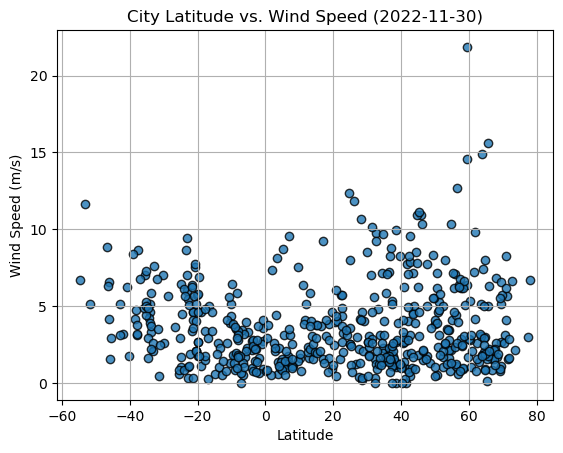

In [6]:
# Build the scatter plots for latitude vs. wind speed

# Convert date to y/m/d format and define variable
date = pd.to_datetime(city_data_df['Date'], unit='s').apply(lambda t: t.strftime('%Y-%m-%d'))[0]

# Create plot
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],c="tab:blue", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Define a function to create Linear Regression plots
def linreg(x, y):
    '''determines linear regression between x and y'''
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x['Lat'],y)
    regress_values = x['Lat'] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create plot and incorporate linear regression, xlabel, and printing of r squared value into function
    plt.scatter(x['Lat'],y,c="tab:blue")
    plt.plot(x['Lat'],regress_values,"r-")       
    plt.annotate(line_eq,(0.15,0.15),xycoords='figure fraction',fontsize=15,color="red",annotation_clip=False)
    plt.xlabel("Latitude")
    print(f"The r-value is: {rvalue**2}")
    return

In [8]:
# Create a DataFrame with only the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kapaa,22.0752,-159.3190,26.18,84,0,1.54,US,1669783964
3,albany,42.6001,-73.9662,0.33,83,100,0.45,US,1669783957
5,thompson,55.7435,-97.8558,-19.91,77,100,6.17,CA,1669784246
8,hurricane,37.1753,-113.2899,2.26,31,6,2.24,US,1669784115
9,chokurdakh,70.6333,147.9167,-22.61,99,100,3.15,RU,1669784247


In [9]:
# Create a DataFrame with only the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,esperance,-33.8667,121.9000,25.21,43,100,3.29,AU,1669784245
2,codrington,-38.2667,141.9667,16.16,64,91,4.73,AU,1669784245
4,beloha,-25.1667,45.0500,24.06,71,100,2.94,MG,1669784246
6,cape town,-33.9258,18.4232,18.95,84,75,4.63,ZA,1669784111
7,atuona,-9.8000,-139.0333,25.45,72,17,6.44,PF,1669784233


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6703602532384509


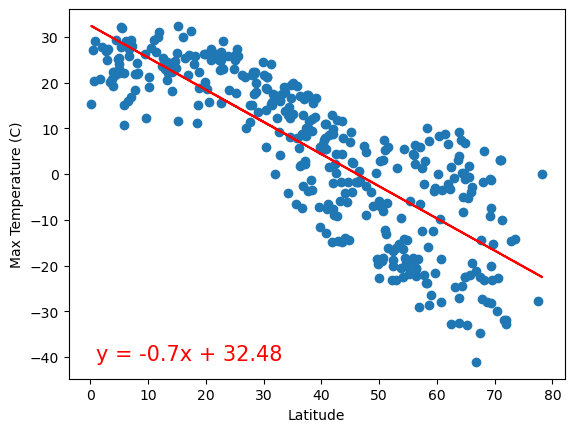

In [10]:
# Max Temp vs Latitude linear regression on Northern Hemisphere
linreg(northern_hemi_df, northern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")

# Show plot
plt.show()

The r-value is: 0.35024915674327683


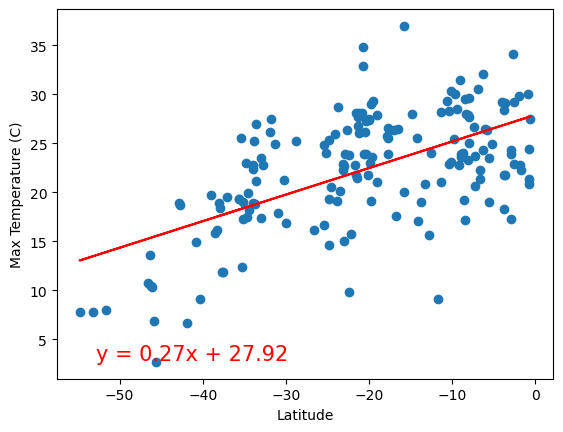

In [11]:
# Max Temp vs Latitude linear regression on Southern Hemisphere
linreg(southern_hemi_df, southern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")

# Show plot
plt.show()

**Discussion about the linear relationship:** <br>
These graphs compare the temperature of a city in respect to where it is located in terms of latitude. The linear regression of the cities across both hemisphere's clearly illustrates there is a correlation between the drop in temperature the further along the latitude axis a city is located from 0. In other words, the further from the equator the city is, the colder it will be. The Northern Hemisphere shows a negative correlation while the Southern Hemisphere illustrates a positive correlation.

While the R-Squared value in the Southern Hemisphere accounts for 35% of the correlation and would be considered a weak correlation, it is nearly double that in the Northern Hemisphere and just shy of being considered strong at 67%.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11210819299625412


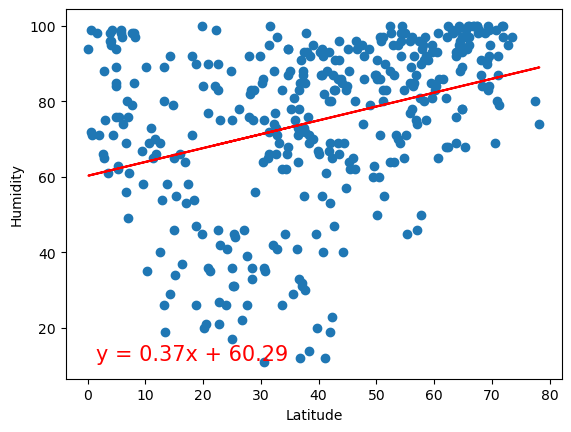

In [12]:
# Humidity vs Latitude linear regression on Northern Hemisphere
linreg(northern_hemi_df, northern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.ylabel("Humidity")

# Show plot
plt.show()

The r-value is: 0.042435837703780975


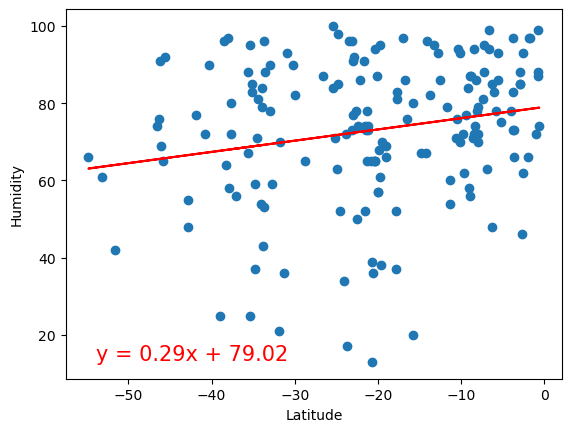

In [13]:
# Humidity vs Latitude linear regression on Southern Hemisphere
linreg(southern_hemi_df, southern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.ylabel("Humidity")

# Show plot
plt.show()

**Discussion about the linear relationship:** <br>
The R-Squared values indicate there is little to no correlation between a city's latitude and the humidity of thatcity in neither the Northern nor Southern hemisphere with scores of 11% and 4% respectively.

However, the overall trend -- despite being a very small positive correlation -- does suggest that you are somewhat less likely to find a city with a low humidity score the closer you are to the equator in the Southern Hemisphere. It is also quite unlikely you will find a city below 60% humidity once north of the 60th latitude in the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06943022047260229


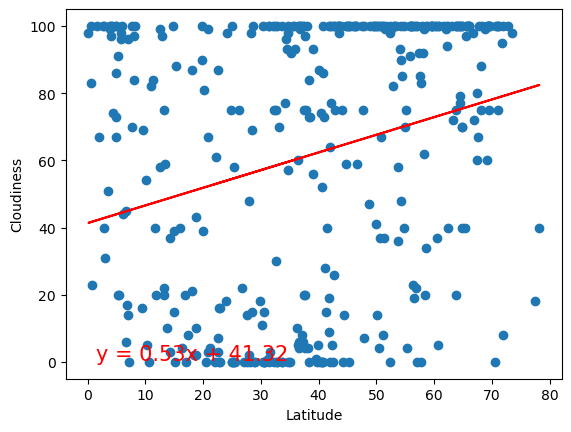

In [14]:
# Cloudiness vs Latitude linear regression on Northern Hemisphere
linreg(northern_hemi_df, northern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.ylabel("Cloudiness")

# Show plot
plt.show()

The r-value is: 0.12209758916871813


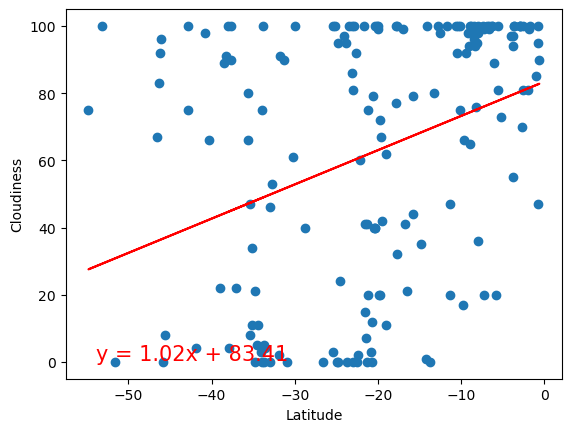

In [15]:
# Cloudiness vs Latitude linear regression on Southern Hemisphere
linreg(southern_hemi_df, southern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.ylabel("Cloudiness")

# Show plot
plt.show()

**Discussion about the linear relationship:**<br>
While both graphs show a positive correlation overall, they indicate there is actually little to no correlation between a city's latitude and how cloudy it will be there regardless of whehter it is the Northern or Southern Hemisphere. 

One of the few things that can be gleaned from these graphs beyond the wide spread of cloudiness across the globe is that there appears to be a larger than fair share of cities that reside on the extreme values of either 0% or 100% cloudiness. Specifically surprising is the number that appear to have 100% cloudiness at the time the data was taken which perhaps indicates that a seasonal effect could be far more prevelant a factor than that of a latitudinal effect.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.022107633159297584


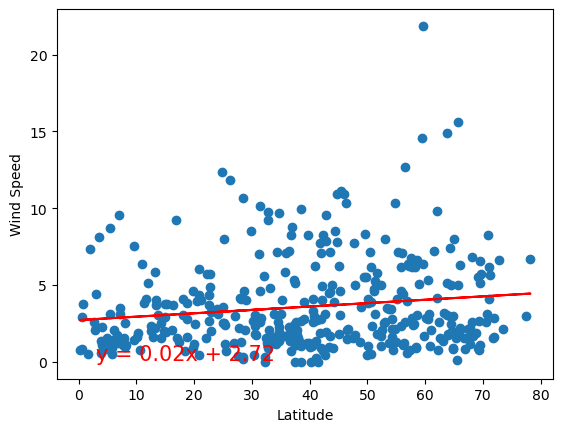

In [16]:
# Wind Speed vs Latitude linear regression on Northern Hemisphere
linreg(northern_hemi_df, northern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.ylabel("Wind Speed")

# Show plot
plt.show()

The r-value is: 0.219168415209101


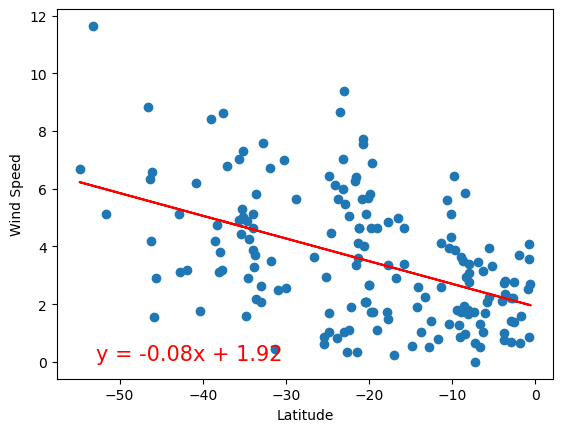

In [17]:
# Wind Speed vs Latitude linear regression on Southern Hemisphere
linreg(southern_hemi_df, southern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.ylabel("Wind Speed")

# Show plot
plt.show()

**Discussion about the linear relationship:**<br>
The relationship between a city's latitude and the wind speed differs a fair degree between the two hemispheres on this day. There is a nearly non-existant positive correlation between the two in the Northern Hemisphere as shown by the nearly flat line and relatively consistent windspeeds regardless of location.

Meanwhile, while the negative correlation is still only weak at best, it is far more pronounced with a 0.219 R Squared value. The wind speeds do, on the whole, seem to be quite random in relation to the latitude, but they still trend as being higher the further south and away from the equator a cit is located. Interestingly, despite this, the Northern Hemisphere actually appears to have more cities that register greater outlier wind speed levels.